# Import libraries


In [1]:
%pip install seaborn
import pandas as pd
import sqlite3
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

Note: you may need to restart the kernel to use updated packages.


# Load dataset

In [2]:
con = sqlite3.connect("data/survive.db")
df = pd.read_sql_query("SELECT * from survive", con)
df.head()

,ID,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Pletelets,Creatinine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight,Favorite color
0,TIG1GE,0,Male,Yes,Normal,50,Low,141,0.7,266000.0,185,105,12.3,180,93,green
1,VXUCV9,1,Male,No,Normal,75,Low,134,2.5,224000.0,99,162,13.0,140,47,black
2,AFH4F1,1,Female,No,Pre-diabetes,80,Low,135,1.3,192000.0,776,179,12.4,150,61,white
3,ZK6PAC,0,Male,No,Normal,-60,Low,136,0.9,228000.0,2261,136,15.3,130,48,yellow
4,6CVBRT,0,Female,No,Normal,70,Low,141,0.9,358000.0,1202,171,13.3,177,64,blue


# Data Cleaning

## - drop null

In [3]:
df.isnull().sum()

ID                            0
Survive                       0
Gender                        0
Smoke                         0
Diabetes                      0
Age                           0
Ejection Fraction             0
Sodium                        0
Creatinine                  499
Pletelets                     0
Creatinine phosphokinase      0
Blood Pressure                0
Hemoglobin                    0
Height                        0
Weight                        0
Favorite color                0
dtype: int64

#### Creatinine has missing 499 values - 3% of the data samples

In [4]:
df.dropna(inplace = True)

## - drop duplicates in 'ID' column

In [5]:
duplicates=df.duplicated(subset='ID', keep=False)
df[duplicates].sort_values(by = 'ID')

,ID,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Pletelets,Creatinine phosphokinase,Blood Pressure,Hemoglobin,Height,Weight,Favorite color
11833,00G7VD,0,Female,No,Pre-diabetes,65,Low,136,1.0,257000.0,720,66,10.2,183,64,green
5817,00G7VD,1,Female,No,Pre-diabetes,82,Low,145,1.0,321000.0,855,152,9.3,154,88,white
13763,00IUNH,0,Male,No,Pre-diabetes,50,Low,130,0.7,260000.0,121,109,10.2,172,67,red
4750,00IUNH,0,Male,No,Diabetes,45,Normal,136,1.0,377000.0,308,139,14.9,189,76,red
13380,03HS9P,0,Male,Yes,Normal,61,Low,136,0.7,267000.0,248,174,16.4,154,70,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13527,ZXGNKE,0,Female,No,Normal,64,Normal,135,1.5,309000.0,62,88,11.8,182,75,blue
5647,ZY89HT,No,Male,Yes,Normal,70,Normal,145,1.1,176000.0,171,168,10.9,171,74,blue
5120,ZY89HT,1,Male,No,Normal,45,Low,145,1.0,385000.0,582,91,12.4,131,58,green
1970,ZYRYZQ,0,Male,Yes,Normal,53,Normal,138,0.7,249000.0,1808,177,10.7,157,72,yellow


In [6]:
df.drop_duplicates(subset = 'ID', keep = 'first', inplace = True)

# - drop features

In [7]:
drop_col = ['Favorite color', 'Height', 'ID']
df.drop(drop_col, axis=1, inplace=True)

#### Diabetes, Favorite color, Height & ID - independent to the survival rate

## - consistency check

In [8]:
df.dtypes

Survive                      object
Gender                       object
Smoke                        object
Diabetes                     object
Age                           int64
Ejection Fraction            object
Sodium                        int64
Creatinine                  float64
Pletelets                   float64
Creatinine phosphokinase      int64
Blood Pressure                int64
Hemoglobin                  float64
Weight                        int64
dtype: object

In [9]:
df['Diabetes'].unique()


array(['Normal', 'Pre-diabetes', 'Diabetes'], dtype=object)

#### assign 'Normal' -> 0,'Pre-diabetes" -> 1, "Diabetes -> 2

In [10]:
df.loc[df['Diabetes'] == 'Normal', 'Diabetes'] = '0'
df.loc[df['Diabetes'] == 'Pre-diabetes', 'Diabetes'] = '1'
df.loc[df['Diabetes'] == 'Diabetes', 'Diabetes'] = '2'
df['Diabetes']= df['Diabetes'].astype('int')
df['Diabetes'].describe()

count    13614.000000
mean         0.620244
std          0.804228
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: Diabetes, dtype: float64

In [11]:
df['Survive'].unique()

array(['0', '1', 'No', 'Yes'], dtype=object)

#### assign 'No' -> 0 & Yes -> 1

In [12]:
df.loc[df['Survive'] == 'No', 'Survive'] = '0'
df.loc[df['Survive'] == 'Yes', 'Survive'] = '1'
df['Survive']= df['Survive'].astype('int')
df['Survive'].describe()

count    13614.000000
mean         0.332305
std          0.471057
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Survive, dtype: float64

In [13]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

#### assign 'Male' -> 1 & 'Female' -> 0

In [14]:
df.loc[df['Gender'] == 'Male', 'Gender'] = '1'
df.loc[df['Gender'] == 'Female', 'Gender'] = '0'
df['Gender']= df['Gender'].astype('int')
df['Gender'].describe()

count    13614.000000
mean         0.649919
std          0.477013
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Gender, dtype: float64

In [15]:
df['Smoke'].unique()

array(['Yes', 'No', 'NO', 'YES'], dtype=object)

#### assign 'Yes' - 'YES' -> 1  & 'No' - 'NO' -> 0

In [16]:
df.loc[df['Smoke'] == 'Yes', 'Smoke'] = '1'
df.loc[df['Smoke'] == 'YES', 'Smoke'] = '1'
df.loc[df['Smoke'] == 'No', 'Smoke'] = '0'
df.loc[df['Smoke'] == 'NO', 'Smoke'] = '0'
df['Smoke']= df['Smoke'].astype('int')
df['Smoke'].describe()

count    13614.000000
mean         0.325547
std          0.468596
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Smoke, dtype: float64

In [17]:
df['Ejection Fraction'].unique()

array(['Low', 'Normal', 'High', 'L', 'N'], dtype=object)

#### assign 'Low' - 'L' -> 1  & 'Normal' - 'N' -> 2 & 'High' -> 3

In [18]:
df.loc[df['Ejection Fraction'] == 'L', 'Ejection Fraction'] = '1'
df.loc[df['Ejection Fraction'] == 'Low', 'Ejection Fraction'] = '1'
df.loc[df['Ejection Fraction'] == 'N', 'Ejection Fraction'] = '2'
df.loc[df['Ejection Fraction'] == 'Normal', 'Ejection Fraction'] = '2'
df.loc[df['Ejection Fraction'] == 'High', 'Ejection Fraction'] = '3'
df['Ejection Fraction']= df['Ejection Fraction'].astype('int')
df['Ejection Fraction'].describe()

count    13614.000000
mean         1.122374
std          0.340050
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Ejection Fraction, dtype: float64

In [19]:
df['Age'].unique()

array([ 50,  75,  80, -60,  70,  55,  65,  60, -40,  53,  68,  42,  45,
        79,  58, -85,  49,  94,  43,  77,  51,  61,  72,  69,  40,  78,
        62,  63,  87,  54,  57,  95,  90,  48, -45,  56, -58,  85, -50,
        86, -65,  73,  67, -52,  82,  59,  46,  44,  64,  52, -69, -42,
        41,  47, -53,  81, -44, -49, -63,  66, -59, -41, -70, -48, -55,
       -51, -73, -75, -57, -64, -78, -54, -90, -80, -86, -61, -46, -68,
       -43, -72, -66, -81, -47, -62, -82, -67])

#### change negative age to positive

In [20]:
df['Age'] = df['Age'].abs()
df.reset_index(drop=True, inplace=True)
df['Age'].describe()

count    13614.000000
mean        60.967166
std         11.901949
min         40.000000
25%         51.000000
50%         60.000000
75%         70.000000
max         95.000000
Name: Age, dtype: float64

#### Cleaned dataset

In [21]:
df.describe()

,Survive,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Pletelets,Creatinine phosphokinase,Blood Pressure,Hemoglobin,Weight
count,13614.000000,13614.000000,13614.000000,13614.000000,13614.000000,13614.000000,13614.000000,13614.000000,13614.000000,13614.000000,13614.000000,13614.000000,13614.000000
mean,0.332305,0.649919,0.325547,0.620244,60.967166,1.122374,136.564419,1.412263,262900.042611,578.886220,103.783605,12.913743,69.543558
std,0.471057,0.477013,0.468596,0.804228,11.901949,0.340050,4.384005,1.044798,97810.948267,949.162194,39.709990,2.500163,25.289067
min,0.000000,0.000000,0.000000,0.000000,40.000000,1.000000,113.000000,0.500000,25100.000000,23.000000,40.000000,9.000000,19.000000
25%,0.000000,0.000000,0.000000,0.000000,51.000000,1.000000,134.000000,0.900000,211000.000000,118.000000,70.000000,10.700000,50.000000
50%,0.000000,1.000000,0.000000,0.000000,60.000000,1.000000,137.000000,1.100000,262000.000000,250.000000,100.000000,12.700000,66.000000
75%,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,140.000000,1.400000,304000.000000,582.000000,137.000000,15.100000,87.000000
max,1.000000,1.000000,1.000000,2.000000,95.000000,3.000000,148.000000,9.400000,850000.000000,7861.000000,179.000000,17.500000,141.000000


# Data Visualization

## - Patients demographic

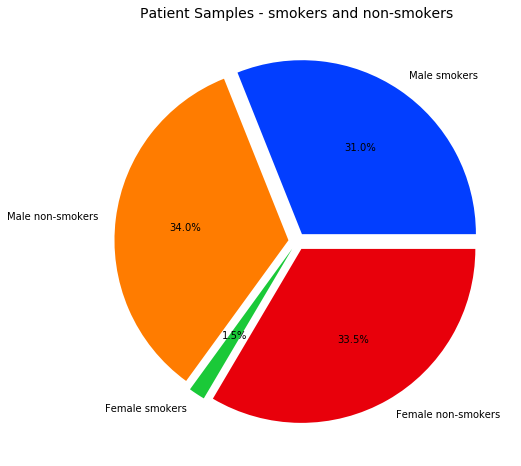

Male smokers      : 4226
Female smokers    : 206
Male non-smokers  : 4622
Female non-smokers: 4560
Sample size of smoking female patients is 1.5%
More samples in this category should be collected to have a balance dataset.


In [22]:
male_smoke=df.loc[(df['Gender']==1)&(df['Smoke']==1)]

female_smoke=df.loc[(df['Gender']==0)&(df['Smoke']==1)]

male_no_smoke=df.loc[(df['Gender']==1)&(df['Smoke']==0)]

female_no_smoke=df.loc[(df['Gender']==0)&(df['Smoke']==0)]

#define data
data = [len(male_smoke),len(male_no_smoke),len(female_smoke),len(female_no_smoke)]
labels = ['Male smokers', 'Male non-smokers', 'Female smokers', 'Female non-smokers']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:4]

#create pie chart
plt.figure(figsize=(10, 8))
plt.title("Patient Samples - smokers and non-smokers", fontsize=14);
plt.pie(data, labels = labels, colors = colors, explode=[0.05]*4, pctdistance=0.6, autopct='%.1f%%')
plt.show()
print('Male smokers      :',len(male_smoke))
print('Female smokers    :',len(female_smoke))
print('Male non-smokers  :',len(male_no_smoke))
print('Female non-smokers:',len(female_no_smoke))
print('Sample size of smoking female patients is 1.5%')
print('More samples in this category should be collected to have a balance dataset.')


Blue represents female
Brown represents male
High survival rate of smoking female patients might due to low sampling size of this category.


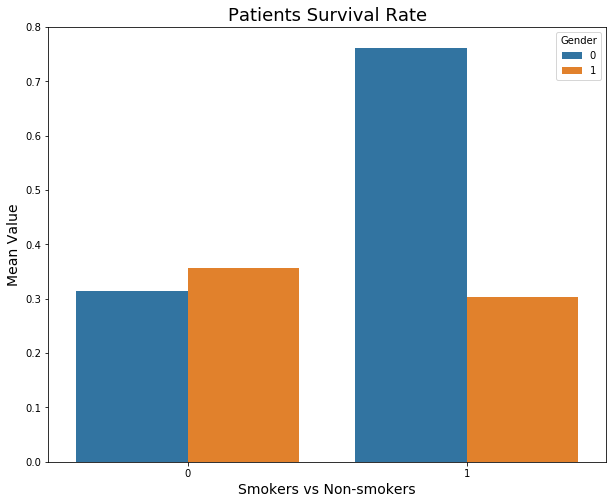

In [23]:
datam =df.groupby(['Gender', 'Smoke']).agg(mean =("Survive",'mean'))
datam =datam.reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(x="Smoke", 
            y="mean", 
            hue="Gender", 
            data=datam)
plt.ylabel("Mean Value", size=14)
plt.xlabel("Smokers vs Non-smokers", size=14)
plt.title("Patients Survival Rate", size=18)
print('Blue represents female')
print('Brown represents male')
print('High survival rate of smoking female patients might due to low sampling size of this category.')

# Check Correlation

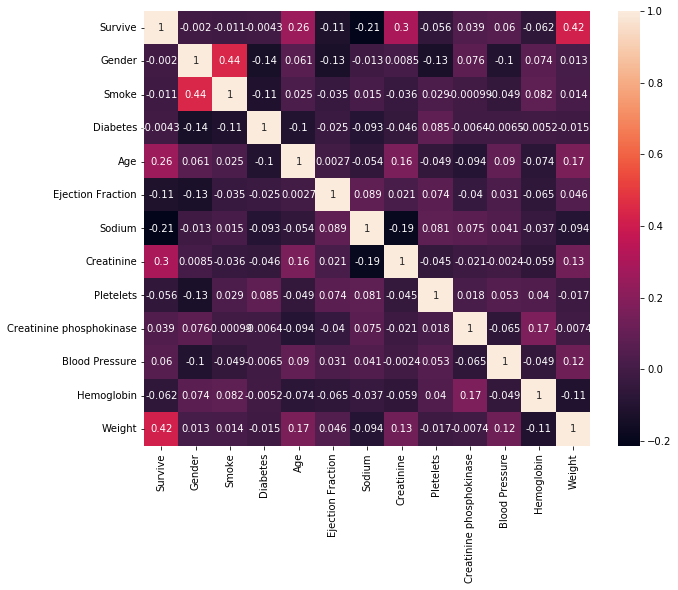

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values, annot=True)

#### 'Age', 'Creatinine', 'Weight' have a positive correlation to 'Survive' with coefficient values > 0.1  'Sodium', 'Ejection Fraction' have negative correlation to 'Survive' with coefficients < -0.1

# Process Data

### Data scaling

In [25]:
target = ['Survive']
variables = df.columns[1:]
names = df[variables].columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df[variables])
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,Gender,Smoke,Diabetes,Age,Ejection Fraction,Sodium,Creatinine,Pletelets,Creatinine phosphokinase,Blood Pressure,Hemoglobin,Weight
0,0.733930,1.439358,-0.771257,-0.921494,-0.359884,1.011802,-0.681748,0.031695,-0.414998,0.030633,-0.245490,0.927567
1,0.733930,-0.694754,-0.771257,1.179080,-0.359884,-0.584970,1.041136,-0.397721,-0.505608,1.466093,0.034502,-0.891468
2,-1.362528,-0.694754,0.472217,1.599195,-0.359884,-0.356860,-0.107454,-0.724895,0.207679,1.894212,-0.205491,-0.337848
3,0.733930,-0.694754,-0.771257,-0.081264,-0.359884,-0.128750,-0.490317,-0.356824,1.772274,0.811322,0.954475,-0.851923
4,-1.362528,-0.694754,-0.771257,0.758965,-0.359884,1.011802,-0.490317,0.972319,0.656512,1.692744,0.154498,-0.219216


#### Split data to training set 80% and testing sets 20%

In [26]:
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state =0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10891, 12) (10891, 1)
(2723, 12) (2723, 1)


# Logistic Regression

In [27]:
from sklearn import linear_model
log = linear_model.LogisticRegression()
log_model = log.fit(X_train, y_train.values.ravel())
log_predictions = log.predict(X_test)

In [28]:
print('Prediction accuracy', log_model.score(X_test, y_test)) #mean accuracy 

Prediction accuracy 0.7752478883584282


### Confusion Matrix (Logistic Regression)

Accurracy: 0.7752478883584282
Precision: 0.7211678832116788
Recall: 0.5398907103825137
F-score: 0.6174999999999999


/home/stdynamics/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


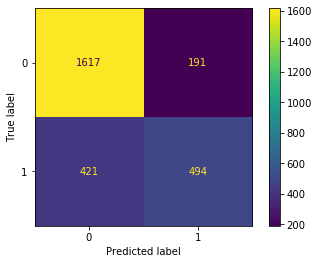

In [29]:
TN, FP, FN, TP = confusion_matrix(y_test,log_predictions).ravel()
test_accu = (TP + TN) / ( TP + TN + FN + FP)
precision = (TP) / (TP + FP)
recall = (TP) /(TP + FN)
f_score = (2 * recall * precision) / (recall + precision)
print('Accurracy:', test_accu)
print('Precision:', precision)
print('Recall:', recall)
print('F-score:', f_score)
#SVC(random_state=0)
plot_confusion_matrix(log_model, X_test, y_test)  
plt.show()

# GaussianNB

In [30]:
from sklearn.naive_bayes import GaussianNB
gaus = GaussianNB()
gaus_model = gaus.fit(X_train, y_train.values.ravel())
gaus_predictions = gaus.predict(X_test)

In [31]:
print('Prediction accuracy:', gaus_model.score(X_test, y_test))

Prediction accuracy: 0.7506426735218509


### Confusion Matrix (Gaussian NB)

Accurracy: 0.7506426735218509
Precision: 0.7107142857142857
Recall: 0.4349726775956284
F-score: 0.5396610169491526


/home/stdynamics/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


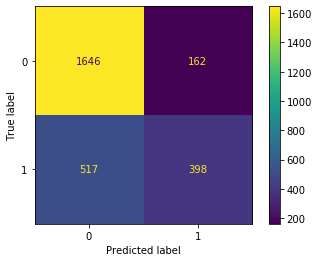

In [32]:
TN, FP, FN, TP = confusion_matrix(y_test,gaus_predictions).ravel()
test_accu = (TP + TN) / ( TP + TN + FN + FP)
precision = (TP) / (TP + FP)
recall = (TP) /(TP + FN)
f_score = (2 * recall * precision) / (recall + precision)
print('Accurracy:', test_accu)
print('Precision:', precision)
print('Recall:', recall)
print('F-score:', f_score)
plot_confusion_matrix(gaus_model, X_test, y_test)  
plt.show()

# Decision Tree

In [33]:
#from sklearn.tree import DecisionTreeClassfier
from sklearn import tree

dtree = tree.DecisionTreeClassifier(criterion = 'entropy')
dtree_model = dtree.fit(X_train,y_train)
dtree_predictions = dtree.predict(X_test)

In [34]:
print('Prediction accuracy', dtree_model.score(X_test, y_test))

Prediction accuracy 0.9988982739625413


### Confusion Matrix (Decision Tree)

Accurracy: 0.9988982739625413
Precision: 0.9967320261437909
Recall: 1.0
F-score: 0.9983633387888707


/home/stdynamics/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


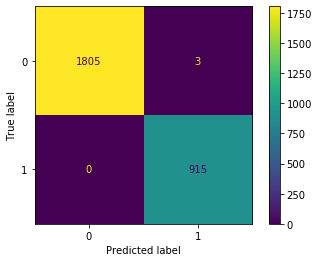

In [35]:
TN, FP, FN, TP = confusion_matrix(y_test,dtree_predictions).ravel()
test_accu = (TP + TN) / ( TP + TN + FN + FP)
precision = (TP) / (TP + FP)
recall = (TP) /(TP + FN)
f_score = (2 * recall * precision) / (recall + precision)
print('Accurracy:', test_accu)
print('Precision:', precision)
print('Recall:', recall)
print('F-score:', f_score)
plot_confusion_matrix(dtree_model, X_test, y_test)  
plt.show()

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion='entropy')
#forest_model = forest.fit(X_train, y_train)
forest_model = forest.fit(X_train, y_train.values.ravel())
forest_predictions = forest.predict(X_test)

In [37]:
print('Prediction accuracy:', forest_model.score(X_test, y_test))

Prediction accuracy: 0.9992655159750276


### Confusion Matrix (Random Forest)

Accurracy: 0.9992655159750276
Precision: 1.0
Recall: 0.9978142076502732
F-score: 0.9989059080962801


/home/stdynamics/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


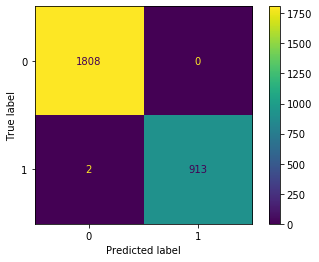

In [38]:
TN, FP, FN, TP = confusion_matrix(y_test,forest_predictions).ravel()
test_accu = (TP + TN) / ( TP + TN + FN + FP)
precision = (TP) / (TP + FP)
recall = (TP) /(TP + FN)
f_score = (2 * recall * precision) / (recall + precision)
print('Accurracy:', test_accu)
print('Precision:', precision)
print('Recall:', recall)
print('F-score:', f_score)
plot_confusion_matrix(forest_model, X_test, y_test)  
plt.show()

# Conclusion

#### Base on the F-score in the 4 algorithm, Random Forest Classifier has the best performance